In this notebook we explore the quantization error. More specifically, we discuss the formula "SNR = 6.02N + 1.76dB".
A good reference for this is Analog Devices "MT-001 TUTORIAL" entitled
`Taking the Mystery out of the Infamous Formula,"SNR = 6.02N + 1.76dB," and Why You Should Care`
by Walt Kester
Available at https://www.analog.com/media/en/training-seminars/tutorials/MT-001.pdf

Note that as mentioned in above tutorial the exact formula is SNR = 6.02N + 1.76 + $10\,{\rm log}_{10}(\frac{F_s}{2BW}$)


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In the following we consider a 4-bit ADC. We assume a ramp signal ranging from -8 to +7.

In [2]:
n = 4
xc = np.arange(-2**(n-1), 2**(n-1) -1, 0.01) # simulation of the continuous signal to be converted to digital signal xc

In [3]:
print(xc)

[-8.   -7.99 -7.98 ...  6.97  6.98  6.99]


Text(0, 0.5, 'xc')

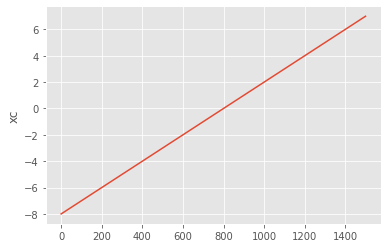

In [4]:
plt.plot(xc)
plt.ylabel('xc')

In [5]:
xd = np.round(xc) # digital version of xc
print(xd)

[-8. -8. -8. ...  7.  7.  7.]


(-9.0, 8.0)

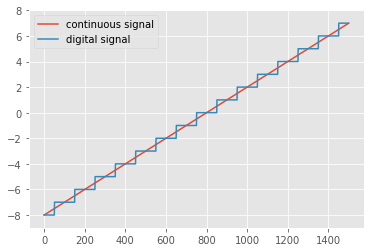

In [6]:
plt.plot(xc)
plt.plot(xd)
plt.legend(['continuous signal', 'digital signal'])
plt.ylim([-9, 8])

The error signal is $x_{\rm true} - x_{\rm estimated}$
Therefore, in our case the error signal is "continuous signal - digital signal"; that is:

(-9.0, 8.0)

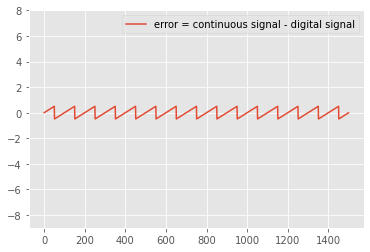

In [7]:
err = xc - xd
plt.plot(err)
plt.legend(['error = continuous signal - digital signal'])
plt.ylim([-9, 8])

Let's plot all in one figure.

(-9.0, 8.0)

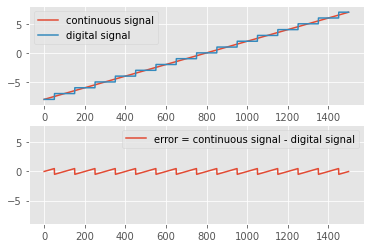

In [8]:
plt.subplot(211)
plt.plot(xc)
plt.plot(xd)
plt.legend(['continuous signal', 'digital signal'])
plt.ylim([-9, 8])

plt.subplot(212)
plt.plot(err)
plt.legend(['error = continuous signal - digital signal'])
plt.ylim([-9, 8])



In [9]:
def pwr(s):
    p = 0
    for x in s:
        p = p + x**2
    return (p/len(s))

def SNR(sg, ns):
    return 10.0*np.log10(pwr(sg)/pwr(ns))

In [10]:
print('Power of the digital signal: %f' % pwr(xd))
print('Power of the error signal:   %f' % pwr(err))
print('Ratio of digital signal power to error signal power: %f' % (pwr(xd)/pwr(err)))

Power of the digital signal: 19.176667
Power of the error signal:   0.083350
Ratio of digital signal power to error signal power: 230.073985


`SNR formula`:
    $$ SNR = 10log_{10}(\frac{\rm Power \, of \, the \, signal}{\rm Power \, of \, the \, noise})$$
    

Note that decibel shows the ratio of two signals. 
* If the signals are `power quantity`, the the decible ratio is defined as follows:
$${\rm rato (dB)} = 10 \, log_{10}(\frac{x}{y})$$
* If the signals are `root-power quantity`, the the decible ratio is defined as follows:
$${\rm rato (dB)} = 20 \, log_{10}(\frac{x}{y})$$

A root-power quantity is a quantity such as voltage, current, sound pressure, electric field strength, speed, or charge density, the square of which, in linear systems, is proportional to power. The term was introduced in ISO 80000-1 § Annex C.

In [11]:
print('SNR: %f dB' % SNR(xc, err))

SNR: 23.579627 dB


In the following we define SNR function using numpy.linalg.norm.
Note that since the norm is rms value we need to use the formula of root-power quantity to calculate the SNR in decible.

In [12]:
def SNR1(sg, ns):
    rms_sg = np.linalg.norm(sg)
    rms_ns = np.linalg.norm(ns)
    return 20*np.log10(rms_sg/rms_ns)

In [13]:
print('SNR: %f dB' % SNR1(xc, err))

SNR: 23.579627 dB


Now lets consider the sampling time of $F_s$ with time interval $\Delta t = \frac{1}{F_s}$.
Then we consider a sine signal with freuqnecy of $f = F_s/2, and digitize it and calculate its SNR.

(-9.0, 9.0)

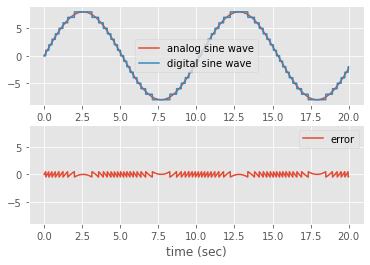

In [69]:
Fs = 100 # sampling frequency (Hz)
dt = 1/Fs # samping time (seconds)
n = 4 # number of ADC bits
Amp = 2**n/2 # amplitude of the sine wave
tf = 20 # final time in seconds
td = np.arange(0, tf, dt) # discrete time
f = Fs/1024 # frequency of the sine wave
x_analog = Amp*np.sin(2*np.pi*f*td)
xd = np.round(x_analog)
err = x_analog - xd

plt.subplot(211)
plt.plot(td, x_analog)
plt.plot(td, xd)
plt.legend(['analog sine wave', 'digital sine wave'])
plt.ylim([-Amp-1, Amp+1])

plt.subplot(212)
plt.plot(td, err)
plt.xlabel('time (sec)')
plt.legend(['error'])
plt.ylim([-Amp-1, Amp+1])

In [70]:
snr = SNR(xd, err)
snr1 = SNR(xd, err)
print('SNR: %f' % snr)
print('SNR1: %f' % snr1)

SNR: 26.373424
SNR1: 26.373424


In [73]:
snr_6p02n_plus_1p76 = 6.02*n + 1.76
print('SNR =  6.02*n + 1.76 = %f' % snr_6p02n_plus_1p76)

SNR =  6.02*n + 1.76 = 25.840000


I don't know why the calculated SNR is not equal to the one calculate uisng `SNR = 6.02N + 1.76dB`, but at least they are colse.